Fake News Detection Using Machine Learning


Saving True.csv to True.csv
Saving Fake.csv to Fake.csv
🔍 Logistic Regression Results
Accuracy: 0.984521158129176
[[4626   84]
 [  55 4215]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

📊 Naive Bayes Results
Accuracy: 0.9337416481069042
[[4436  274]
 [ 321 3949]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4710
           1       0.94      0.92      0.93      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



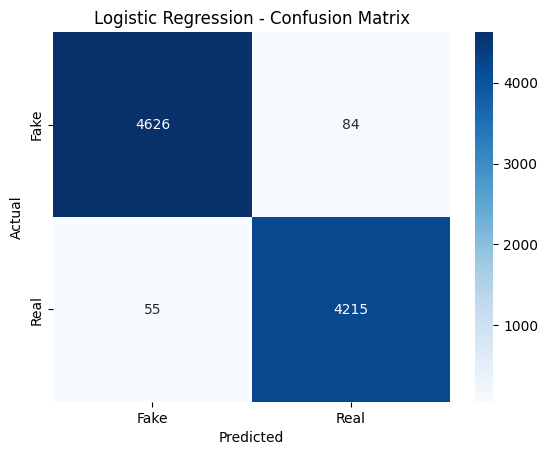

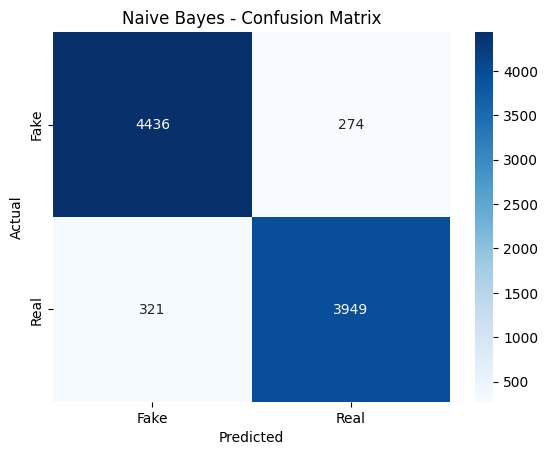

/tmp/ipython-input-7-931749626.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


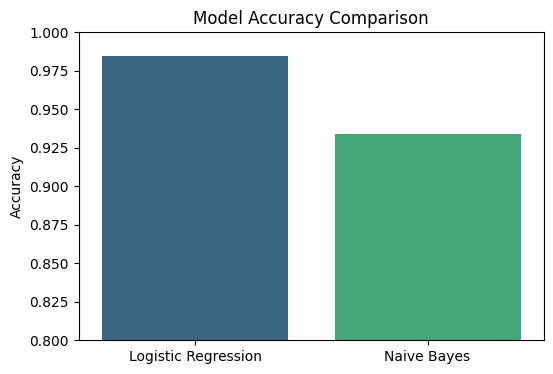

In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
uploaded = files.upload()
# Step 2: Load the datasets
# Ensure 'Fake.csv' and 'True.csv' are in the same directory
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add labels
fake['label'] = 0  # Fake
real['label'] = 1  # Real

# Combine datasets
df = pd.concat([fake, real], ignore_index=True)

# Shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Step 3: Preprocess text
# We'll use only the title and text columns (optional: you can combine both)
df['content'] = df['title'] + " " + df['text']
df = df[['content', 'label']].dropna()
# Step 4: Split data
X = df['content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
# Step 6a: Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

print("🔍 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
# Step 6b: Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

print("📊 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(confusion_matrix(y_test, nb_preds))
print(classification_report(y_test, nb_preds))
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
# Plot for Logistic Regression
plot_conf_matrix(y_test, lr_preds, "Logistic Regression - Confusion Matrix")

# Plot for Naive Bayes
plot_conf_matrix(y_test, nb_preds, "Naive Bayes - Confusion Matrix")
# Accuracy comparison bar plot
accuracies = [accuracy_score(y_test, lr_preds), accuracy_score(y_test, nb_preds)]
models = ['Logistic Regression', 'Naive Bayes']

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.8, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()